<h2>Общие вводные</h2>

Основные данные для проекта: гипотезы с набором параметрои и датасет с информацией об A/B тестировании заказов.

Цель нашего проекта представлена двумя основными целями:
1. проритизировать гипотезы по фреймворкам ICE и RICE, объяснить сложившуюся разницу
2. Провести анализ A/B-тест заказов сделать выводы об их разницу

Проект будет разделен на 2 части:
1. "Приоритизация" гипотез"
2. Анализ A/B теста

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

<h2>Приоритизация гипотез</h2>

Основной список задач:
- Применить фреймворк <b>ICE</b> для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Примените фреймворк <b>RICE</b> для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [2]:
#загружаем данные
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    "Ошибка загрузки файла"

<h3>Приоритизация гипотез через фреймворк ICE</h3>

Фреймворк ICE рассчитывается как:  
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [3]:
#расширим колонки
pd.options.display.max_colwidth = None

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)

In [6]:
hypothesis.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Согласно оценке фреймворка ICE, первым делом стоит начать с гипотезы:
> Запустить акцию, дающую скидку на товар в день рождения

<h3>Приоритизация гипотез через фреймворк RICE</h3>

Фреймворк RICE рассчитывается как:
$$RICE = \frac{Reach * Impact * Confidence}{Efforts}$$

In [7]:
hypothesis['RICE'] = round((hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach']) / hypothesis['Efforts'], 2)

In [8]:
hypothesis.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Выбранная в предыдущем пункте главная гипотеза о скидке на товар на денья рождения сместиласть аж на пятое место.

Первое место по оценке RICE заняла гипотеза:
> Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

<b>Общий вывод<b>

Таким образом мы увидели как добавление компонента Reach во фреймворк изменило ранжирование гипотез. Всё благодаря параметру Reach, который вносит степень охвата.
Можно сказать, что из-за высокой степени охвата (Reach-показателя) наша гипотеза о добавлении формы подписки, которая отставала по показателям Impact и Confidence, значительно вырвалась вперед.

<h2>Анализ A/B тестирования</h2>

<h3>Сравнение кумулятивных метрик</h3>

Основной список задач:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объясните его

In [9]:
#загружаем данные
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
#преобразовываем даты
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
#заменим названия колонок для удобства работы
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']

<h4>Кумулятивная выручка по группам</h4>

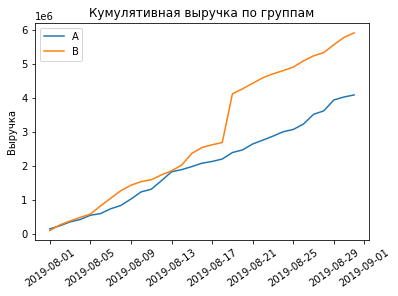

In [12]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

#разворачиваем подписи по оси X, добавляем подписи
plt.xticks(rotation=35)

plt.title('Кумулятивная выручка по группам')

plt.ylabel('Выручка')

plt.legend();


Мы видим, что в группе B выручка стабильно больше чем в группе А, однако на графике видно резкий скачок, что может говорить о присутствии аномалий в данных.

<h4>Кумулятивная среднего чека по группам</h4>

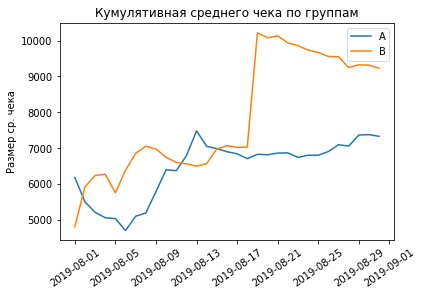

In [13]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=35)

plt.title('Кумулятивная среднего чека по группам')

plt.ylabel('Размер ср. чека')

plt.legend();

Как и на предыдущем графике присутствует всплеск показателей в группе B. Что лишний наталкивает на мысль об аномально больших по выручке заказах.

<h4>Относительное изменение кумулятивного среднего чека группы B к группе A</h4>

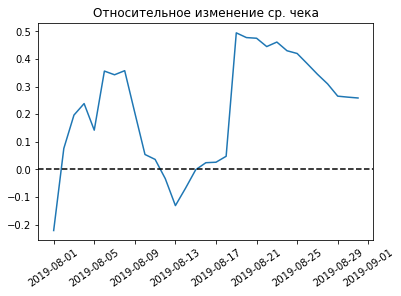

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение ср. чека')


plt.xticks(rotation=35);

Результаты тесты резко менялись в разные даты. Это могут быть заказы с аномальными параметрами.

<h4>Кумулятивная среднего количества заказов на посетителя по группам</h4>

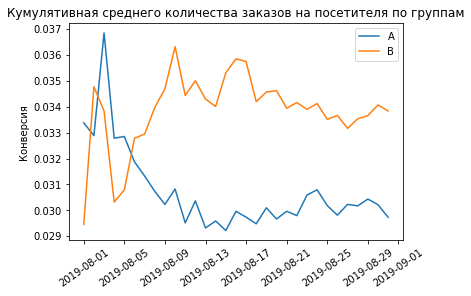

In [15]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивная среднего количества заказов на посетителя по группам')

plt.ylabel('Конверсия')

plt.xticks(rotation=35)

plt.legend();

 
На графике видно однозначно стабильное улучшение конверсии на человека: улучшение примерно на 4-5 п.п.

<h4>Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A</h4>

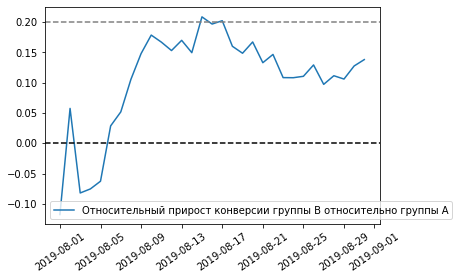

In [16]:
#объединяем таблицы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date',
                                                                           right_on='date', how='left',
                                                                           suffixes=['A', 'B'])

#строим график
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=35)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

Почти с самого начала группа B лидирует, относительный прирост на уровне 10-15%

<b>Общий вывод:</b>  
Мы выявили, что разница в результатах теста в кумулятивных метрика присутствует, некоторые графики указывали на аномалии. Рассмотрим имеющиеся данные подробнее.

<h3>Анализ выбросов и всплесков</h3>

<h4>Количество заказов по пользователям</h4>

In [17]:
#группировка заказов по пользователям
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

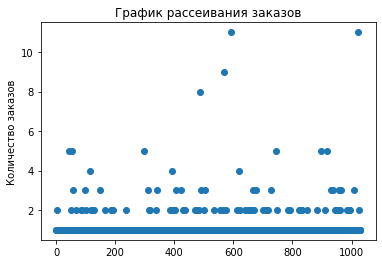

In [18]:
#строим график рассеивания заказов
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title('График рассеивания заказов')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders']);

In [19]:
#определим границу аномальных значений
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Из точечного графика видно, что чаще всего количество заказов на одного пользователя 1 - 2. Но есть и гораздо большее количество заказов, приходящихся на 1-го человека: 8, 9 и даже 10+  
Граница 95% значений заказов на одного пользователя пролегает на значении 3, иными словами 95% всех заказов пользователей не превышает 3 ед. на 1 пользователя.

<h4>Стоимость заказов</h4>

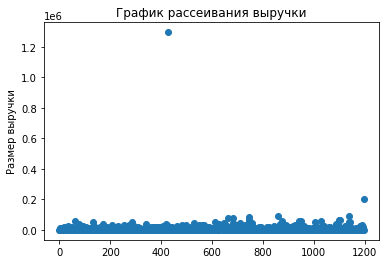

In [20]:
#построим точечный график распределения выручек
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title('График рассеивания выручки')
plt.ylabel('Размер выручки')
plt.scatter(x_values, orders['revenue']);

In [21]:
#определим границу аномальных значений
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

 
Размер выручки по большей части колеблется в пределах 20 000 тыс. р. 95-ый процентиль выручки равен 28 000 тыс. р. выручки.  
Но присутствует и значительно отклоняющийся по стоимости заказ стоимостью 100 000+ тыс.

<b>Общий вывод:</b>  
В данных по заказам присутствуют всплески значений выбивающиеся из общей картины: это пользователи с большим количеством заказов, или средник чек заказа значительно превышающий типичную картину, что вносит коррективы в общую картину A/B тестирования.  
  Зафиксируем предел нормы показателей:
- Норма количества заказов: не более 3-х
- Норма среднего чека: не более 29 000 р.

<h3>Подсчет статистической значимости разниц групп A и B</h3>

В нашем случае для подсчета статистической значимости будет удобно воспользоваться стат.методом Мана-Уитни. Преимущества данного метода в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Это позволяет работать с данными, где присутствуют выбросы.

Наши гипотезы звучат следующим образом:  
- H0 - выборки не имеют статистически значимой разницы и одинаковы
- H1 - выборки имеют статистически значимую разницу и не одинаковы  

Порог статистической значимости 0.05

In [22]:
#подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

<h4>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным</h4>

Гипотезы:
- H0 - различий в среднем количестве заказов на посетителя среди групп по сырым данным нет
- H1 - различия в среднем количестве заказов на посетителя среди групп по сырым данным есть

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

if stats.mannwhitneyu(sampleA, sampleB)[1] < 0.05:
    print("p-value:", "{0:.3f}.".format(stats.mannwhitneyu(sampleA, sampleB)[1]), "Нулевая гипотеза отвергнута")
else:
    print("p-value:", "{0:.3f}.".format(stats.mannwhitneyu(sampleA, sampleB)[1]), "Нулевая гипотеза не отвергнута")
    
print("Степень разности составила:", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017. Нулевая гипотеза отвергнута
Степень разности составила: 0.138


P-value ниже установленного порога статистической значимости, в таком случае мы можем говорить о существовании статистически значимой разнице A и B групп. Разница среднего количества заказов между группам 13,8%.

<h4>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</h4>

Гипотезы:
- H0 - различий в среднем чеке заказов на посетителя среди групп по сырым данным нет
- H1 - различия в среднем чеке заказов на посетителя среди групп по сырым данным есть

In [24]:
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < 0.05:
    print("p-value:", "{0:.3f}.".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                           orders[orders['group']=='B']['revenue'])[1]),
          "Нулевая гипотеза отвергнута"
         )
else:
    print("p-value:", "{0:.3f}.".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                           orders[orders['group']=='B']['revenue'])[1]),
          "Нулевая гипотеза не отвергнута"
         )
    
print("Степень разности составила:", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729. Нулевая гипотеза не отвергнута
Степень разности составила: 0.259


Статистически значимой разницы между чеками не обнаружено, однако степень разности между ними 25,9% это очень большой процент. Может ли дело быть в сильном отклонении от нормы в одной из групп? Сравним с очищенными данными.

<h4>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</h4>

Гипотезы:
- H0 - различий в среднем количестве заказов на посетителя среди групп по очищенным данным нет
- H1 - различия в среднем количестве заказов на посетителя среди групп по очищенным данным есть

In [25]:
#аномальное количество заказов > 3
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)

#аномально дорогие заказы > 29000
usersWithExpensiveOrders = orders[orders['revenue'] > 29000]['userId']

#пользователя с аномальными параметрами заказов
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Расчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < 0.05:
    print("p-value:", "{0:.3f}.".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]),
          "Нулевая гипотеза отвергнута"
         )
else:
    print("p-value:", "{0:.3f}.".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]),
          "Нулевая гипотеза не отвергнута"
         )
    
print("Степень разности составила:", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.018. Нулевая гипотеза отвергнута
Степень разности составила: 0.259


Картина изменилась: появилась статистическая значимость в количестве заказов между группами, как и степень разности. Теперь она равна 25,9%. Что же по среднему чеков?

<h4>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</h4>

Гипотезы:
- H0 - различий в среднем количестве чеке на посетителя среди групп по очищенным данным нет
- H1 - различия в среднем чеке заказов на посетителя среди групп по очищенным данным есть

In [27]:

print("p-value:", 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue']
        )[1]
    )
)

print("Степень разности составила:", 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.964
Степень разности составила: -0.019


Теперь мы видим, что никакой статистической значимости в средних чеках групп A и B не обнаружено.

<b>Общий вывод:</b>  
Присутствие значительных выбросов повиляло на статистические выводы о тесте. Очистив данные от них, мы получили прямо противоположные результаты: теперь разница в количестве заказов статистически значима, а разница среднего размера чека - нет.

<h3>Итоговый вывод:</h3>

В результате A/B тестирования мы проверили каким образом могут себя вести данные и какие инструменты лучше использовать для сравнения разницы в группах, а именно:
- кумулятивные метрики
- графики
- статистические тесты

В кумулятивных метриках было заметно, что данные за некоторый период совершают резкие скачки в группе B.  
Углубившись и проведя аналитику с помощью графиков рассеивания мы определили, что в наборе данных присутствуют аномальные значения, которые влияют на итоговые данные.  
Отфльтровав обнаруженные выбросы и проанализировав очищенные данные мы пришли к выводу:

<b>Между группами A и B присутствует статистически значимая разница и в группе B она направлена в положительную сторону по части влияния на количество заказов среди пользователей. Однако, тесты не выявили разницы в среднем чеке заказов совершаемых пользователей.</b>  
Из чего можно предположить, что тестировалась гипотеза направленная на повторение заказов пользователями, а не увеличение размера среднего чека.